In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

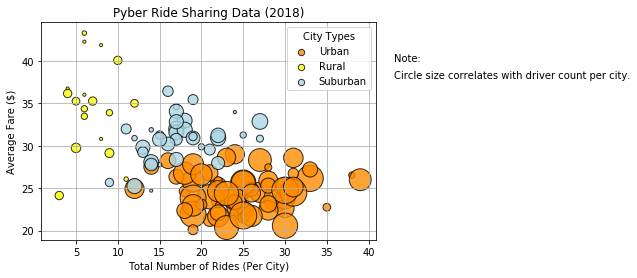

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_city = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

xurban = urban_city["ride_id"].count()
yurban = urban_city["fare"].mean()
zurban = urban_city["driver_count"].mean()

xrural = rural_city["ride_id"].count()
yrural = rural_city["fare"].mean()
zrural = rural_city["driver_count"].mean()

xsuburban = suburban_city["ride_id"].count()
ysuburban = suburban_city["fare"].mean()
zsuburban = suburban_city["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(xurban, yurban, label = "Urban", s=zurban * 10, color=["darkorange"], 
            edgecolor="black", alpha = 0.80, marker="o")
plt.scatter(xrural, yrural, label = "Rural", s=zrural * 10, color=["yellow"], 
            edgecolor="black", alpha = 0.80, marker="o")
plt.scatter(xsuburban, ysuburban, label = "Suburban", s=zsuburban  * 10, color=["lightblue"], 
            edgecolor="black", alpha = 0.80, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
key = plt.legend(labels = ['Urban', 'Rural', 'Suburban'], 
                 title= "City Types", fontsize = 10)
key.legendHandles[0]._sizes = [40]
key.legendHandles[1]._sizes = [40]
key.legendHandles[2]._sizes = [40]
# Incorporate a text label regarding circle size
plt.text(43,40,'Note:')
plt.text(43,38,'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig('BubblePlot.png')
plt.show()


## Total Fares by City Type

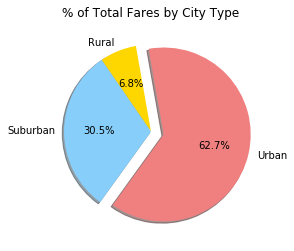

In [3]:
# Calculate Type Percents
type_groupped = pyber_df.groupby(['type'])
fare = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, .15)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Fares by City Type")


# Save Figure

plt.savefig('TotalFaresbyCityType.png')
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

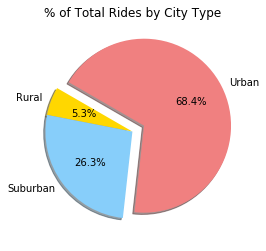

In [4]:
# Calculate Ride Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, .15)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")



# Save Figure

plt.savefig('TotalRidesbyCityType.png')
plt.show()

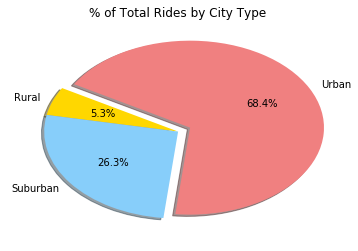

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

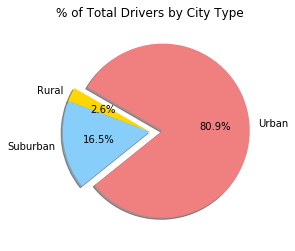

In [5]:
# Calculate Driver Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers = type_groupped_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, .15)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")


# Save Figure

plt.savefig('TotalDriversbyCityType.png')
plt.show()

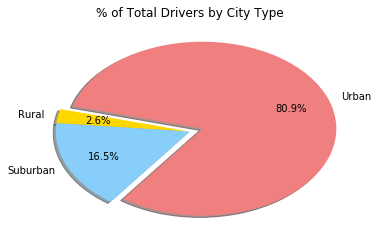

In [6]:
# Show Figure
plt.show()